<a href="https://colab.research.google.com/github/Suhit97/StumbleUpon/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c stumbleupon -p /content/gdrive/My\ Drive/Stumble_Upon

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 2.96MB/s]
 62% 5.00M/8.02M [00:00<00:00, 17.0MB/s]
100% 8.02M/8.02M [00:00<00:00, 23.0MB/s]
  0% 0.00/3.45M [00:00<?, ?B/s]
100% 3.45M/3.45M [00:00<00:00, 55.8MB/s]
 98% 154M/157M [00:03<00:00, 50.5MB/s]
100% 157M/157M [00:03<00:00, 41.3MB/s]


In [ ]:
%cd /content/gdrive/MyDrive/Stumble_Upon/

/content/gdrive/MyDrive/Stumble_Upon


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf



In [ ]:
df_train = pd.read_csv('train.tsv.zip',encoding ="ISO-8859-1", sep='\t')
df_test = pd.read_csv('test.tsv.zip',encoding ="ISO-8859-1", sep='\t')

df_train.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [ ]:
df_train.at[1,'boilerplate']

'{"title":"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races","body":"And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a trigger and the race starts Boom What people don t consider When a conventional gun goes off the sound travels to the ears of the closest runner a fraction of a second sooner than the others That s just enough to matter and why the latest starting pistol has traded in the mechanical boom for orchestrated electronic noise Omega has been the watch company tasked as the official timekeeper of the Olympic Games since 1932 At the 2010 Vancouv

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             3171 non-null   object 
 1   urlid                           3171 non-null   int64  
 2   boilerplate                     3171 non-null   object 
 3   alchemy_category                3171 non-null   object 
 4   alchemy_category_score          3171 non-null   object 
 5   avglinksize                     3171 non-null   float64
 6   commonlinkratio_1               3171 non-null   float64
 7   commonlinkratio_2               3171 non-null   float64
 8   commonlinkratio_3               3171 non-null   float64
 9   commonlinkratio_4               3171 non-null   float64
 10  compression_ratio               3171 non-null   float64
 11  embed_ratio                     3171 non-null   float64
 12  framebased                      31

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [ ]:
df_train.label.value_counts()

1    3796
0    3599
Name: label, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_train.copy()

y = df_train.label

X = X.drop( ['url','urlid','boilerplate','label'], axis=1)

X = X.fillna(-999)

for c in X.columns[X.dtypes == 'object']:
    X[c] = X[c].factorize()[0]


rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

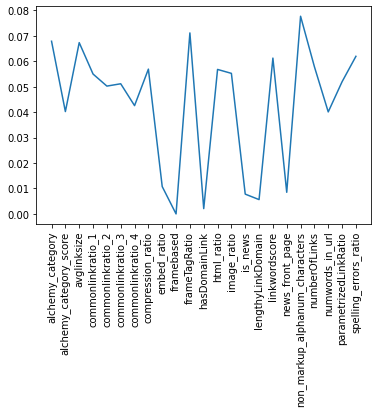

In [ ]:
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

In [ ]:
print(len(df_test.urlid))

3171


In [ ]:
import json

title = []
body = []
urlid = []
label = []

for i in range(len(df_train.label)):
    text = json.loads(df_train['boilerplate'][i])
    if 'title' in text.keys() and 'body' in text.keys():
        title.append(text.get('title'))
        body.append(text.get('body'))
        urlid.append(df_train['urlid'][i])
        label.append(df_train['label'][i])

train_dict = {'urlid':urlid,'title':title,'body':body,'label':label}
train_new = pd.DataFrame.from_dict(train_dict) 

train_new.dropna()


,urlid,title,body,label
0,4042,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...,0
1,8471,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...,1
2,1164,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...,1
3,6684,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...,1
4,9006,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...,0
...,...,...,...,...
7389,8958,Kno Raises 46 Million More To Build Most Power...,Marc Andreessen is normally enthusiastic about...,0
7390,8895,Why I Miss College,Mar 30 2009 I d like to congratulate Jane on h...,0
7391,1191,Sweet Potatoes Eat This Not That i'm eating t...,They re loaded with vitamin C which smoothes o...,1
7392,5612,Naturally Ella,,1


In [ ]:
title = []
body = []
urlid = []

for i in range(len(df_test.urlid)):
    text = json.loads(df_test['boilerplate'][i])
    if 'title' in text.keys() and 'body' in text.keys():
        title.append(text.get('title'))
        body.append(text.get('body'))
        urlid.append(df_test['urlid'][i])
        

test_dict = {'urlid':urlid,'title':title,'body':body}
test_new = pd.DataFrame.from_dict(test_dict) 

test_new.dropna()


,urlid,title,body
0,5865,Homemade Enchilada Sauce Lynn s Kitchen Advent...,I usually buy my enchilada sauce Yes I knew I ...
1,782,lolpics Stun grenade ar,funny pictures at lolpics.se. the best funny ...
2,6962,Treadmills,"treadmills, stair, climbers, treadmills"
3,7640,Father s Tactics Used by Assad to Crush Revolt...,Enlarge image Syrian President Bashar al Assad...
4,3589,Stem Turns Lemons and Limes Into Juicy Atomize...,Quirky s Stem turns any citrus fruit into an a...
...,...,...,...
3166,7264,Peep Brownie S mores Busy Mommy An Iowa Mom Blog,Easter candy is hitting the shelves and I ve b...
3167,9714,Marijuana infused cheesecake Medical Cannabis ...,Cannabis infused cheesecake is one of the tast...
3168,5903,Most Viewed Submissions All Time most viewed s...,www tastespotting com January 27 is National C...
3169,3176,How to Get a Complete Workout with Nothing But...,Everyone knows exercise plays an important rol...


In [ ]:
y = train_new['label']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [ ]:
import re 
import string

In [ ]:
train_new.isnull().any()

urlid    False
title     True
body      True
label    False
dtype: bool

In [ ]:
train_new.isnull().sum()

urlid     0
title    12
body     57
label     0
dtype: int64

In [ ]:
def remove_noise(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('@\S+|https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

In [ ]:
train_new['title'] = train_new['title'].astype(str)
train_new['body'] = train_new['body'].astype(str)
train_new['title'] = train_new['title'].apply(lambda x : remove_noise(x))
train_new['title'] = train_new['title'].apply(lambda x : x.lower())
train_new['body'] = train_new['body'].apply(lambda x : remove_noise(x))
train_new['body'] = train_new['body'].apply(lambda x : x.lower())
train_new['joined'] = train_new[['title', 'body']].apply(lambda x: ' '.join(x), axis = 1) 
train_new.head()

,urlid,title,body,label,joined
0,4042,ibm sees holographic calls air breathing batte...,a sign stands outside the international busine...,0,ibm sees holographic calls air breathing batte...
1,8471,the fully electronic futuristic starting gun t...,and that can be carried on a plane without the...,1,the fully electronic futuristic starting gun t...
2,1164,fruits that fight the flu fruits that fight th...,apples the most popular source of antioxidants...,1,fruits that fight the flu fruits that fight th...
3,6684,foolproof tips for better sleep,there was a period in my life when i had a lot...,1,foolproof tips for better sleep there was a ...
4,9006,the coolest jerseys you didn t know existed c...,jersey sales is a curious business whether you...,0,the coolest jerseys you didn t know existed c...


In [ ]:
test_new['title'] = test_new['title'].astype(str)
test_new['body'] = test_new['body'].astype(str)
test_new['title'] = test_new['title'].apply(lambda x : remove_noise(x))
test_new['title'] = test_new['title'].apply(lambda x : x.lower())
test_new['body'] = test_new['body'].apply(lambda x : remove_noise(x))
test_new['body'] = test_new['body'].apply(lambda x : x.lower())
test_new['joined'] = test_new[['title', 'body']].apply(lambda x: ' '.join(x), axis = 1) 
test_new.head()

,urlid,title,body,joined
0,5865,homemade enchilada sauce lynn s kitchen advent...,i usually buy my enchilada sauce yes i knew i ...,homemade enchilada sauce lynn s kitchen advent...
1,782,lolpics stun grenade ar,funny pictures at lolpicsse the best funny im...,lolpics stun grenade ar funny pictures at lo...
2,6962,treadmills,treadmills stair climbers treadmills,treadmills treadmills stair climbers treadmills
3,7640,father s tactics used by assad to crush revolt...,enlarge image syrian president bashar al assad...,father s tactics used by assad to crush revolt...
4,3589,stem turns lemons and limes into juicy atomize...,quirky s stem turns any citrus fruit into an a...,stem turns lemons and limes into juicy atomize...


In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [ ]:
def preprocess(text, stem=False):

  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
train_new.joined = train_new.joined.apply(lambda x: preprocess(x))
test_new.joined = test_new.joined.apply(lambda x: preprocess(x))

In [ ]:
train_new['joined'].head()

0    ibm sees holographic calls air breathing batte...
1    fully electronic futuristic starting gun elimi...
2    fruits fight flu fruits fight flu cold flu men...
3    foolproof tips better sleep period life lot pr...
4    coolest jerseys know existed coolest jerseys h...
Name: joined, dtype: object

In [ ]:
test_new['joined'].head()

0    homemade enchilada sauce lynn kitchen adventur...
1    lolpics stun grenade ar funny pictures lolpics...
2      treadmills treadmills stair climbers treadmills
3    father tactics used assad crush revolt threate...
4    stem turns lemons limes juicy atomizers gadget...
Name: joined, dtype: object

## Evergreen content wordcloud

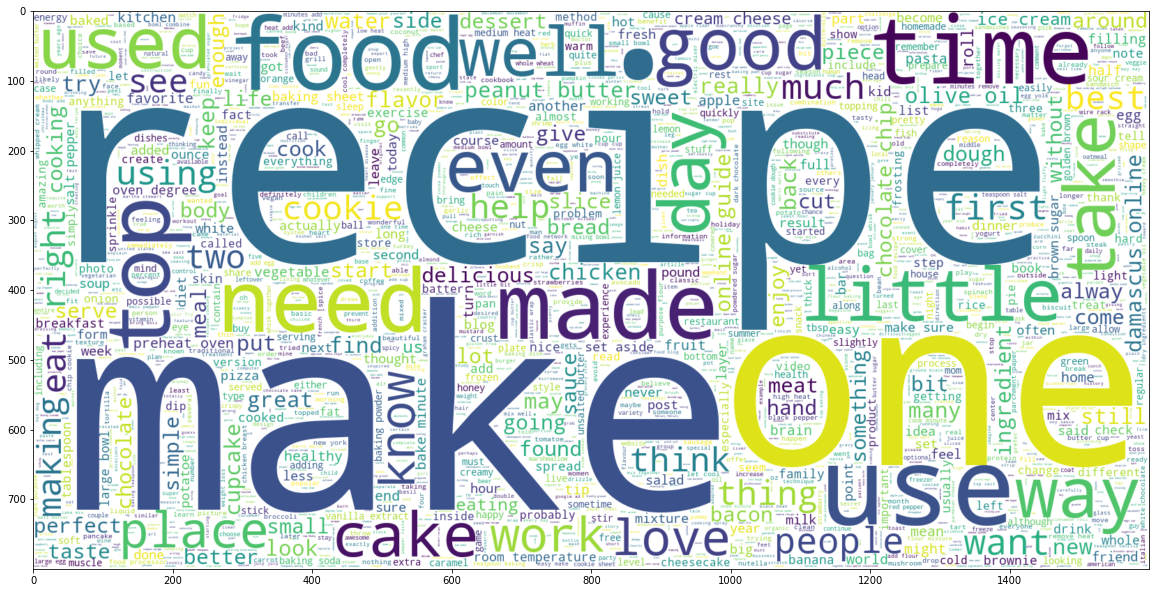

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color='white', max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_new[train_new.label == 1].joined))
plt.imshow(wc , interpolation = 'bilinear')

## Ephemeral content word cloud

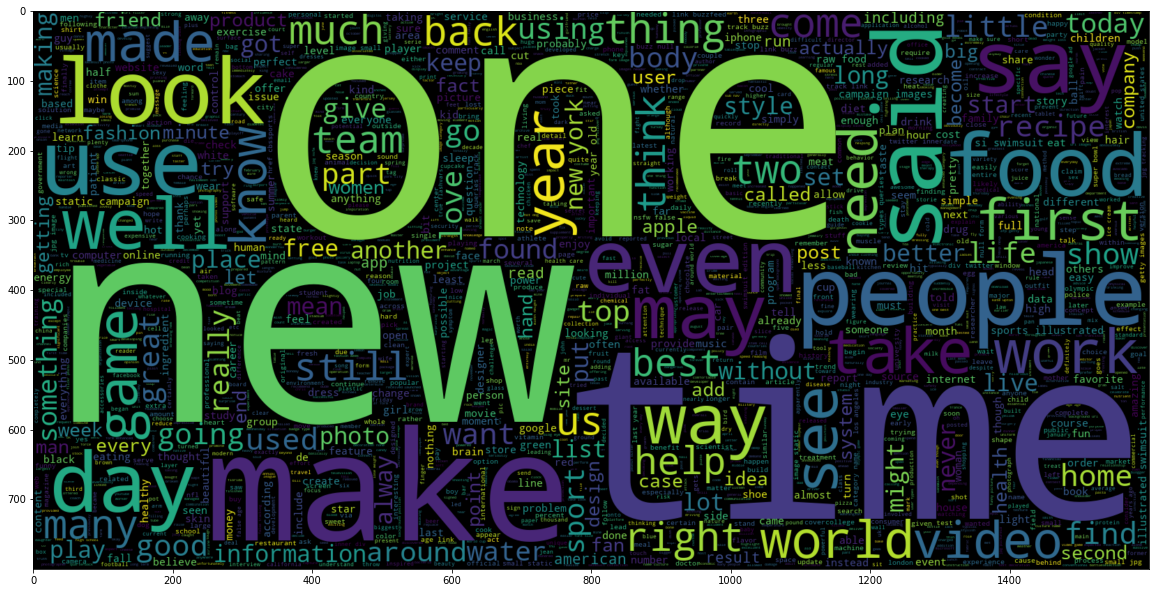

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color='black', max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_new[train_new.label == 0].joined))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
!nvidia-smi

Wed Feb 17 16:04:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 507), reused 1383 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 11.89 MiB/s, done.
Resolving deltas: 100% (507/507), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

Checking out files: 100% (2554/2554), done.


In [ ]:
!pip install -Uqr models/official/requirements.txt

     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 215kB 14.2MB/s 
     |████████████████████████████████| 296kB 21.4MB/s 
     |████████████████████████████████| 102kB 7.8MB/s 
     |████████████████████████████████| 25.9MB 112kB/s 
     |████████████████████████████████| 174kB 43.4MB/s 
     |████████████████████████████████| 3.7MB 40.6MB/s 
     |████████████████████████████████| 706kB 33.5MB/s 
     |████████████████████████████████| 358kB 40.4MB/s 
     |████████████████████████████████| 1.2MB 39.9MB/s 
     |████████████████████████████████| 11.5MB 31.1MB/s 
     |████████████████████████████████| 37.6MB 86kB/s 
     |████████████████████████████████| 645kB 40.2MB/s 
     |████████████████████████████████| 2.2MB 43.9MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
ERROR: pandas-gbq 0.13.3 has requirement google-cloud-

In [ ]:
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

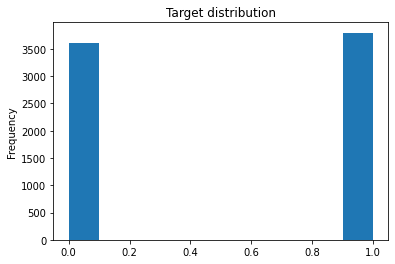

In [ ]:
train_new.label.plot(kind='hist', title='Target distribution');

In [ ]:
valid_df, train_df = train_test_split(train_new, random_state=42, train_size=0.05, stratify=train_new.label.values)

train_df.shape, valid_df.shape

((7025, 5), (369, 5))

In [ ]:
with tf.device('/cpu:0'):
    train_data = tf.data.Dataset.from_tensor_slices((train_df['joined'].values, train_df['label'].values))
    valid_data = tf.data.Dataset.from_tensor_slices((valid_df['joined'].values, valid_df['label'].values))


    for text, label in train_data.take(1):

        print(text)
        print(label)

tf.Tensor(b'anthony bourdain quebec anthony bourdain eats raw seal inuit family quebec anthony bourdain quebec inuit seal guts gore eat feast eskimo travel events', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:

label_list = [0,1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

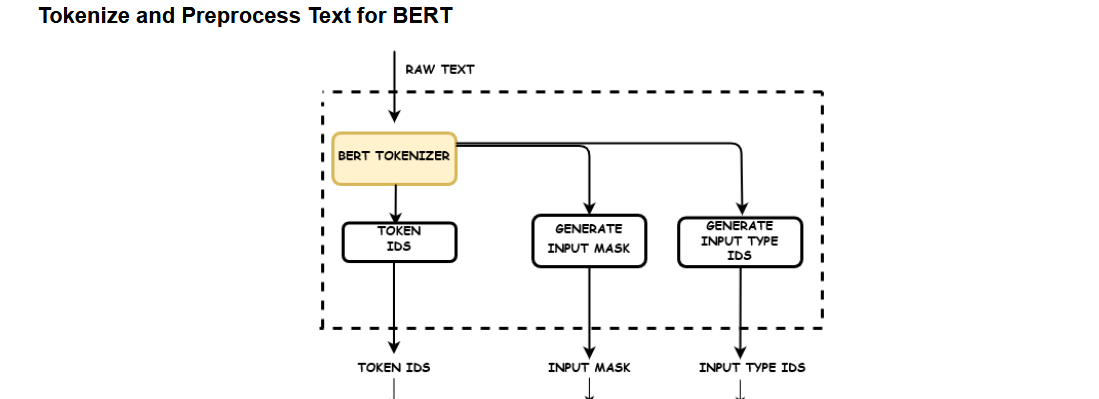

In [ ]:
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):

    example = classifier_data_lib.InputExample(guid=None,
                                               text_a = text.numpy(),
                                               text_b = None,
                                               label = label.numpy())
    feature = classifier_data_lib.convert_single_example(0, example,
                                                         label_list,
                                                         max_seq_length,
                                                         tokenizer)
    return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [ ]:
def to_feature_map(text, label):
    input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],
                                                                  Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
    input_ids.set_shape([max_seq_length])
    input_mask.set_shape([max_seq_length])
    segment_ids.set_shape([max_seq_length])
    label_id.set_shape([])

    x = {
        'input_word_ids':input_ids,
        'input_mask':input_mask,
        'input_type_ids':segment_ids
    }

    return (x, label_id)

In [ ]:
with tf.device('/cpu:0'):
    # train
    train_data = (train_data.map(to_feature_map,
                                 num_parallel_calls=tf.data.experimental.AUTOTUNE)
                                .shuffle(1000)
                                .batch(32, drop_remainder=True)
                                .prefetch(tf.data.experimental.AUTOTUNE))

  

    # valid
    valid_data = (valid_data.map(to_feature_map,
                                 num_parallel_calls=tf.data.experimental.AUTOTUNE)
                                .batch(32, drop_remainder=True)
                                .prefetch(tf.data.experimental.AUTOTUNE)
    )
#The resulting tf.data.Datasets return (features, labels) pairs, as expected by keras.Model.fit:

In [ ]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# Building the model
def create_model():
    input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
    input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")
   
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

    drop = tf.keras.layers.Dropout(0.4)(pooled_output)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(drop)

    model = tf.keras.Model(
        inputs={
            'input_word_ids': input_word_ids,
            'input_mask': input_mask,
            'input_type_ids': input_type_ids
        },
        outputs=output)
    return model

In [ ]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

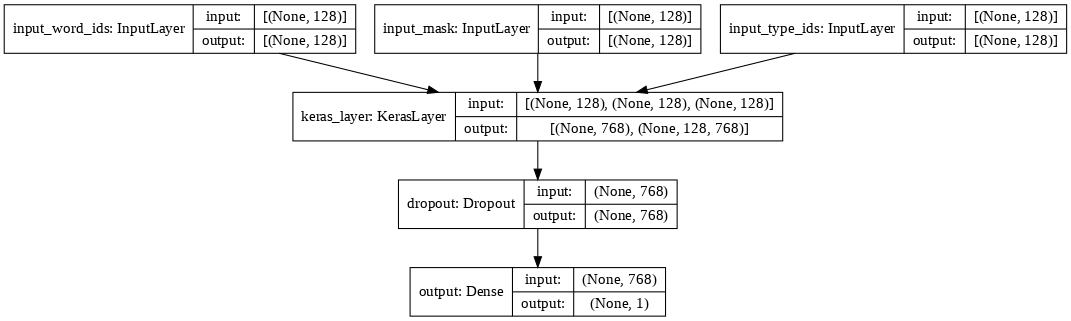

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

In [ ]:
epochs = 12
history = model.fit(train_data,
                    validation_data = valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/12
219/219 [==============================] - 339s 2s/step - loss: 0.4903 - binary_accuracy: 0.7847 - val_loss: 0.4151 - val_binary_accuracy: 0.8210
Epoch 2/12
219/219 [==============================] - 338s 2s/step - loss: 0.4289 - binary_accuracy: 0.8136 - val_loss: 0.4164 - val_binary_accuracy: 0.8068
Epoch 3/12
219/219 [==============================] - 342s 2s/step - loss: 0.3777 - binary_accuracy: 0.8343 - val_loss: 0.4369 - val_binary_accuracy: 0.8068
Epoch 4/12
219/219 [==============================] - 341s 2s/step - loss: 0.2881 - binary_accuracy: 0.8784 - val_loss: 0.5596 - val_binary_accuracy: 0.8011
Epoch 5/12
219/219 [==============================] - 341s 2s/step - loss: 0.2058 - binary_accuracy: 0.9145 - val_loss: 0.5803 - val_binary_accuracy: 0.7955
Epoch 6/12
219/219 [==============================] - 341s 2s/step - loss: 0.1275 - binary_accuracy: 0.9421 - val_loss: 0.6216 - val_binary_accuracy: 0.7756
Epoch 7/12
219/219 [==============================] - 340s

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

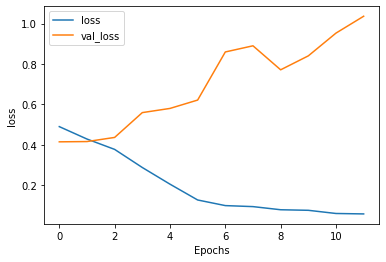

In [ ]:
plot_graphs(history, 'loss')

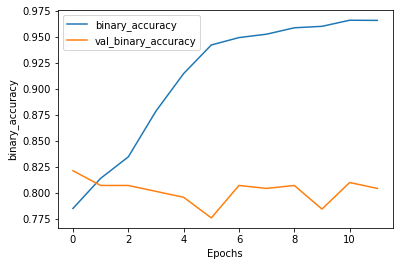

In [ ]:
plot_graphs(history, 'binary_accuracy')

In [ ]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,urlid,label
0,5865,0
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [ ]:
Xids_test = np.zeros((test_new.shape[0],max_seq_length))
Xmask_test = np.zeros((test_new.shape[0],max_seq_length))

for i,sequence in enumerate(test_new.joined):
    tokens=tokenizer.encode_plus(sequence,max_length=max_seq_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids_test[i,:],Xmask_test[i,:]=tokens['input_ids'],tokens['attention_mask']

In [ ]:
dataset_test=tf.data.Dataset.from_tensor_slices((Xids_test,Xmask_test))

def map_func(input_ids,mask):
    return {'input_ids':input_ids,'attention_mask':mask}

dataset_test=dataset_test.map(map_func)
dataset_test=dataset_test.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
valid_data = tf.data.Dataset.from_tensor_slices((valid_df['joined'].values

In [ ]:

test_data = tf.data.Dataset.from_tensor_slices((test_new.joined, [0]*len(test_new.joined)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
threshold = 0.8


In [ ]:
test_new['predictions'] = (predictions > 0.8).astype(int)

ValueError: ignored